# **Predição de Sobrevivência de Pacientes com Cirrose**

**[Base de Dados proveniente do Kaggle](https://www.kaggle.com/datasets/joebeachcapital/cirrhosis-patient-survival-prediction)**

## **Objetivo**

**Investigar o efeito do tratamento utilizando a droga D-penicillamine**

## **Sobre o Dataset**

**Essa base de dados contém dados de pacientes da [Mayo Clinic](https://www.mayoclinic.org/) que participaram de um estudo entre os anos de 1974 e 1984 para análisar a efetividade da droga D-penicillamine no tratamento de pacientes com Cirrose Hepática**
* **Tamanho da Amostra**: Inicialmente haviam 424 pacientes, porém somente 312 pacientes optaram por participarem do teste, foi feito o acompanhamento dos 112 restantes dos quais 6 rapidamente ficaram irrastreáveis. (para essa análise será utilizado a informação dos 312 pacientes que optaram por participar do teste)
* A base consiste em 17 parâmetros clínicos e o status do paciente (0 = Morto, 1 = Censurado, 2 = Censurado por transplante de fígado)

### **Tabela de Variáveis**

|Variable Name|Role|Type|Demographic|Description|Units|Missing Values|
|-------------|----|----|-----------|-----------|-----|--------------|
|ID|ID|Integer||unique identifier||no|
|N_Days|Other|Integer||number of days between registration and the earlier of death, transplantation, or study analysis time in July 1986||no|
|Status|Target|Categorical||status of the patient C (censored), CL (censored due to liver tx), or D (death)||no|
|Drug|Feature|Categorical||type of drug D-penicillamine or placebo||yes|
|Age|Feature|Integer|Age|age|days|no|
|Sex|Feature|Categorical|Sex|M (male) or F (Female)||no|
|Ascites|Feature|Categorical||presence of ascites N (No) or Y (Yes)||yes|
|Hepatomegaly|Feature|Categorical||presence of hepatomegaly N (No) or Y (Yes)||yes|
|Spiders|Feature|Categorical||presence of spiders N (No) or Y (Yes)||yes|
|Edema|Feature|Categorical||presence of edema N (no edema and no diuretic therapy for edema), S (edema present without diuretics, or edema resolved by diuretics), or Y (edema despite diuretic therapy)||no|
|Bilirubin|Feature|Constinuos||serum bilirubin|mg/dl|no|
|Cholesterol|Feature|Integer||serum cholesterol|mg/dl|yes|
|Albumin|Feature|Continuous||albumin|gm/dl|no|
|Copper|Feature|Integer||urine copper|ug/day|yes|
|Alk_Phos|Feature|Continuous||alkaline phosphatase|U/liter|yes|
|SGOT|Feature|Continuous||SGOT|U/ml|yes|
|Tryglicerides|Feature|Integer||tryglicerides||yes|
|Platelets|Feature|Integer||platelets per cubic|ml/1000/yes|
|Prothrombin|Feature|Continuous||prothrombin time|s|yes|
|Stage|Feature|Categorical||histologic stage of disease (1,2,3 or 4)||yes|

## **Pré-Processamento de dados**

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [2]:
dataset = pd.read_csv('cirrhosis.csv')
dataset.dtypes

ID                 int64
N_Days             int64
Status            object
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
dtype: object

In [3]:
# Remoção do Campo ID pois o mesmo não é útil para a análise
dataset = dataset.drop(columns=['ID'])

# Remoção dos Pacientes que não fizeram parte do teste
dataset = dataset[dataset.Drug.notna()]

# Remoção dos Pacientes que foram censurados devido a transplante de fígado
dataset = dataset[dataset.Status.isin(['C','D'])]

# Divisão da idade por 365 (convertendo idade de dias para Anos)
dataset.Age = np.round(dataset.Age/365,0)

In [4]:
# Como sabemos que alguns campos tem valores em branco (mesmo com os pacientes que participaram do teste) temos 2 opções: 
# 1 - Remover todos os registros com valores em branco
# 2 - Preencher os valores em branco (preenchimento com média, último valor ou primeiro valor)
# Para essa análise vou optar pela remoção dos registros com valores em branco

quantidade_antes = len(dataset)
print(f'Quantidade antes da remoção: {quantidade_antes}')
dataset = dataset.dropna()
quantidade_depois = len(dataset)
print(f'Qauntidade após remoção: {quantidade_depois}')
print(f'Porcentagem de registros removidos: {100-(quantidade_depois/quantidade_antes)*100:.2f}%')

Quantidade antes da remoção: 293
Qauntidade após remoção: 258
Porcentagem de registros removidos: 11.95%


In [5]:
campos_correcao_tipo = ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Cholesterol', 'Copper', 'Tryglicerides', 'Platelets', 'Stage', 'Age']
correcao_tipo = ['category' , 'category', 'category', 'category', 'category', 'category', 'category', 'int64', 'int64', 'int64', 'int64', 'category', 'int64']

try:
    for campo, tipo in zip(campos_correcao_tipo, correcao_tipo):
        dataset[campo] = dataset[campo].astype(tipo)
except:
    print(campo)

dataset.dtypes

N_Days              int64
Status           category
Drug             category
Age                 int64
Sex              category
Ascites          category
Hepatomegaly     category
Spiders          category
Edema            category
Bilirubin         float64
Cholesterol         int64
Albumin           float64
Copper              int64
Alk_Phos          float64
SGOT              float64
Tryglicerides       int64
Platelets           int64
Prothrombin       float64
Stage            category
dtype: object

## **Análise exploratória**

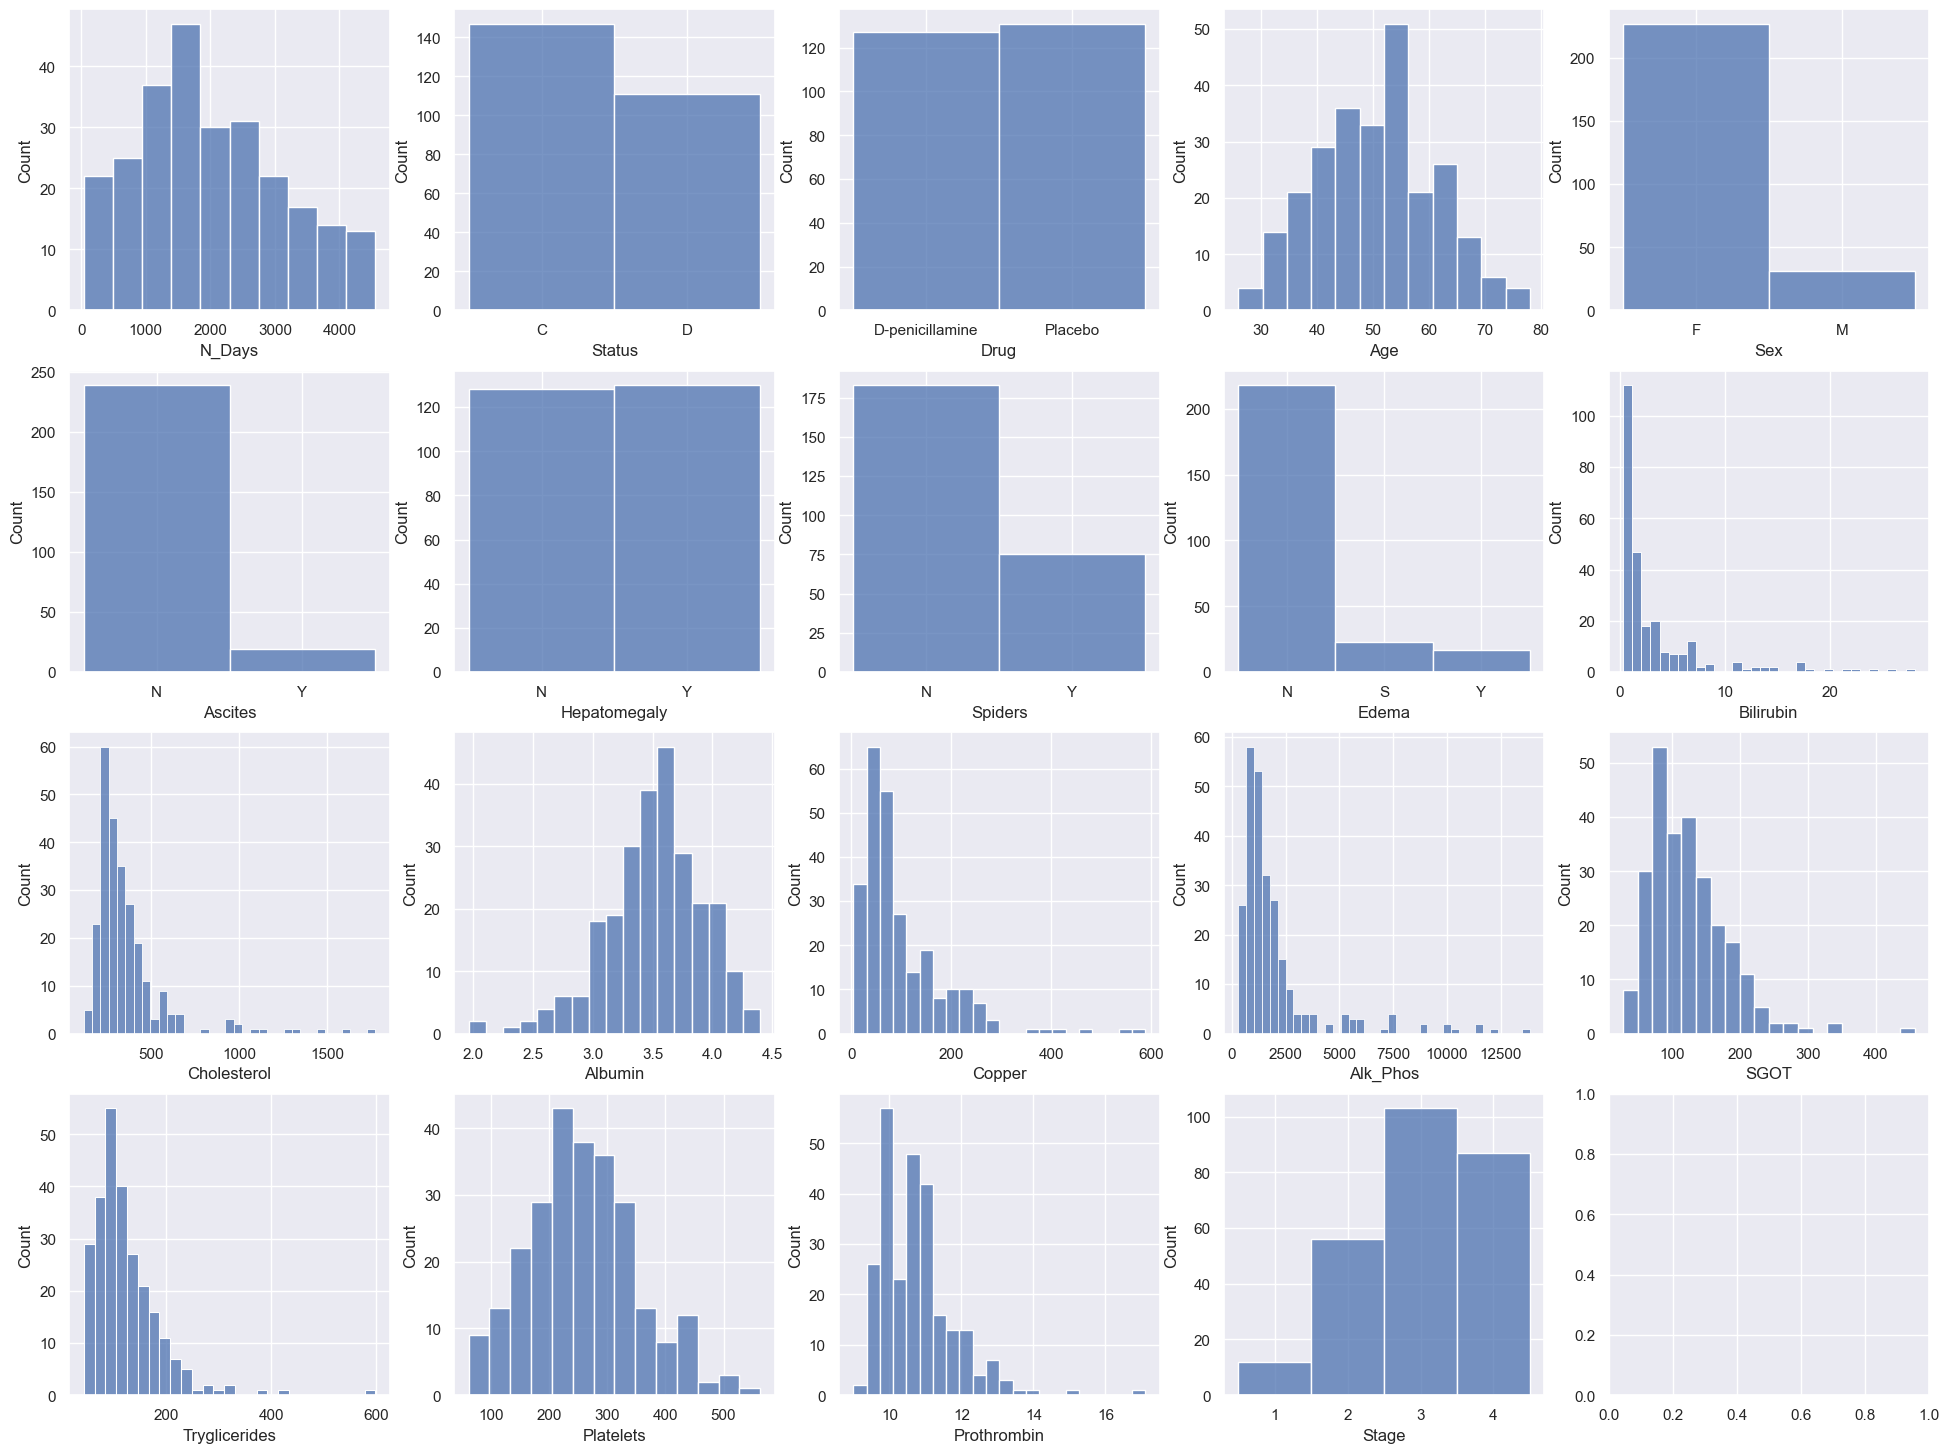

In [6]:
fig,ax = plt.subplots(4,5)
fig.set_figheight(18)
fig.set_figwidth(24)

linha = 0
coluna = 0
for i, column in enumerate(dataset.columns):
    if i>0 and i%5 == 0: 
        linha+=1
        coluna=0
    sns.histplot(data=dataset,x=column,ax=ax[linha,coluna])
    coluna+=1

plt.show()


* Podemos notar no histograma de N_Days uma assimetria positiva
* Temos um maior número de dados censurados (pessoas que deixaram o estudo ou que sobreviveram o período completo do mesmo) do que de mortes confirmadas
* Temos uma quantidade quase idêntica de pacientes fazendo o uso da droga e de placebo
* A maior parte dos pacientes possuí idades na faixa 40-60
* Temos uma predominância de mulheres participando do estudo
* A maioria dos pacientes não apresentaram Ascites ou Edema
* A quantidade de pacientes com e sem Hepatomegaly é quase idêntica
* Uma grande parte dos pacientes não possuí Spiders
* Tirando Albumin e Platelets a maioria dos parâmetros médicos possuí assimetria a direita

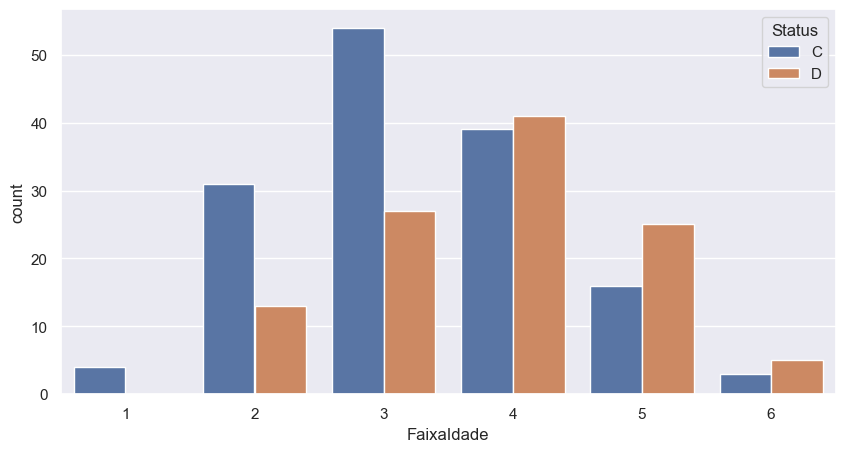

In [7]:
curiosidade = dataset[['Age','Status']].copy()
curiosidade['FaixaIdade'] = 0
for idade in curiosidade.Age.unique():
    if idade >= 20 and idade < 31:
        curiosidade.loc[curiosidade.Age == idade, 'FaixaIdade'] = 1
    elif idade > 30 and idade < 41:
        curiosidade.loc[curiosidade.Age == idade, 'FaixaIdade'] = 2
    elif idade > 40 and idade < 51:
        curiosidade.loc[curiosidade.Age == idade, 'FaixaIdade'] = 3
    elif idade > 50 and idade < 61:
        curiosidade.loc[curiosidade.Age == idade, 'FaixaIdade'] = 4
    elif idade > 60 and idade < 71:
        curiosidade.loc[curiosidade.Age == idade, 'FaixaIdade'] = 5
    else:
        curiosidade.loc[curiosidade.Age == idade, 'FaixaIdade'] = 6

plt.figure(figsize=(10,5))
sns.countplot(curiosidade, x='FaixaIdade', hue='Status')
plt.xlabel='Faixa de Idade'
plt.show()

**Olhando os dados ficou claro que seria difícil visualizar os dados utilizando-os do jeito que estavam, portanto eu separei eles em faixas para poder ver a proporção de mortos e censurados em cada faixa**

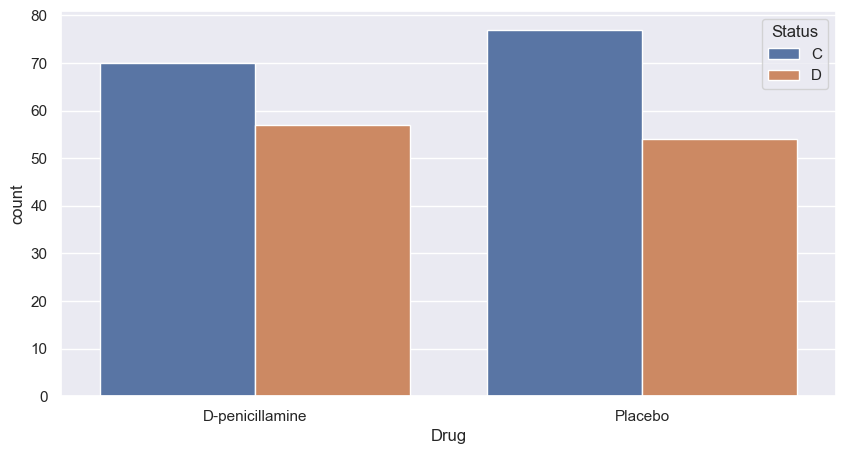

In [8]:
plt.figure(figsize=(10,5))
sns.countplot(dataset, x='Drug', hue='Status')
plt.show()

**Gráfico para a visualização de quantas pessoas de cada grupo são dados censurados ou mortos**

In [25]:
from lifelines import KaplanMeierFitter, NelsonAalenFitter
from lifelines.statistics import logrank_test
from scipy.stats import gaussian_kde

In [10]:
dataset.Drug.unique()

['D-penicillamine', 'Placebo']
Categories (2, object): ['D-penicillamine', 'Placebo']

In [11]:
dataset.Status.unique()

['D', 'C']
Categories (2, object): ['C', 'D']

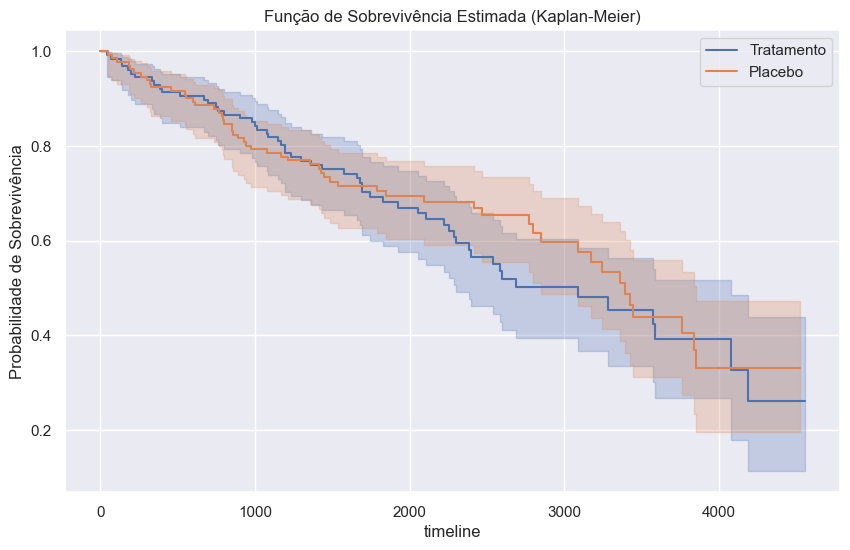

In [21]:
dataset_tratado = dataset.copy()
dataset_tratado.Status = dataset_tratado.Status.map({'C':0, 'D':1})

# Separação dos dados (em tratamento e placebo)
grupo_a = dataset_tratado[dataset_tratado.Drug == 'D-penicillamine'].copy()
grupo_b = dataset_tratado[dataset_tratado.Drug == 'Placebo'].copy()

# Estimação de Kaplan-Meier
kmf_a = KaplanMeierFitter()
kmf_b = KaplanMeierFitter()

# Ajustar os modelos
kmf_a.fit(durations=grupo_a.N_Days, event_observed=grupo_a.Status, label='Tratamento')
kmf_b.fit(durations=grupo_b.N_Days, event_observed=grupo_b.Status, label='Placebo')

# Visualização
plt.figure(figsize=(10,6))

kmf_a.plot_survival_function(ci_show=True)
kmf_b.plot_survival_function(ci_show=True)
plt.title('Função de Sobrevivência Estimada (Kaplan-Meier)')
plt.ylabel('Probabilidade de Sobrevivência')
plt.grid(True)
plt.show()

**Aparentemente temos uma redução na expectativa de vida para os indivíduos que utilizaram o medicamento, iremos verificar mais a frente utilizando o teste de Log-Rank**

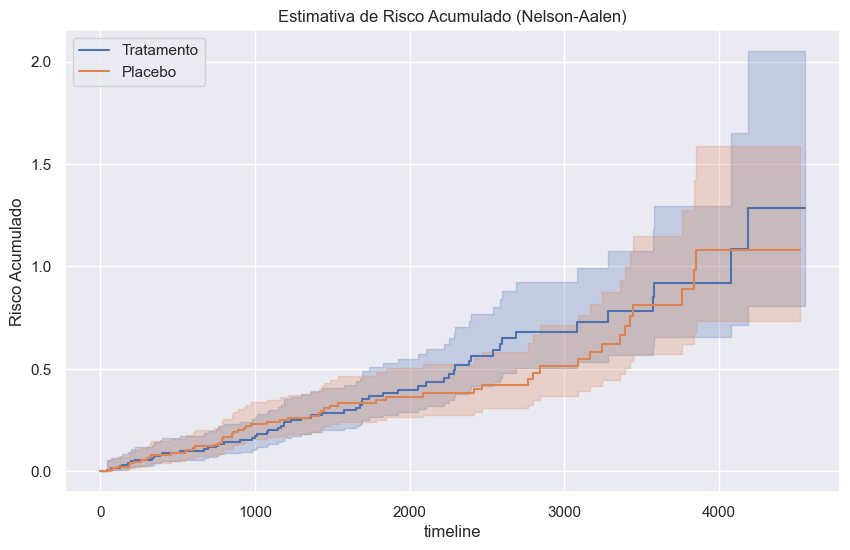

In [22]:
# Estimação de Kaplan-Meier
naf_a = NelsonAalenFitter()
naf_b = NelsonAalenFitter()

# Ajustar os modelos
naf_a.fit(durations=grupo_a.N_Days, event_observed=grupo_a.Status, label='Tratamento')
naf_b.fit(durations=grupo_b.N_Days, event_observed=grupo_b.Status, label='Placebo')

# Visualização
plt.figure(figsize=(10,6))
naf_a.plot_cumulative_hazard(ci_show=True)
naf_b.plot_cumulative_hazard(ci_show=True)
plt.title('Estimativa de Risco Acumulado (Nelson-Aalen)')
plt.ylabel('Risco Acumulado')
plt.grid(True)
plt.show()

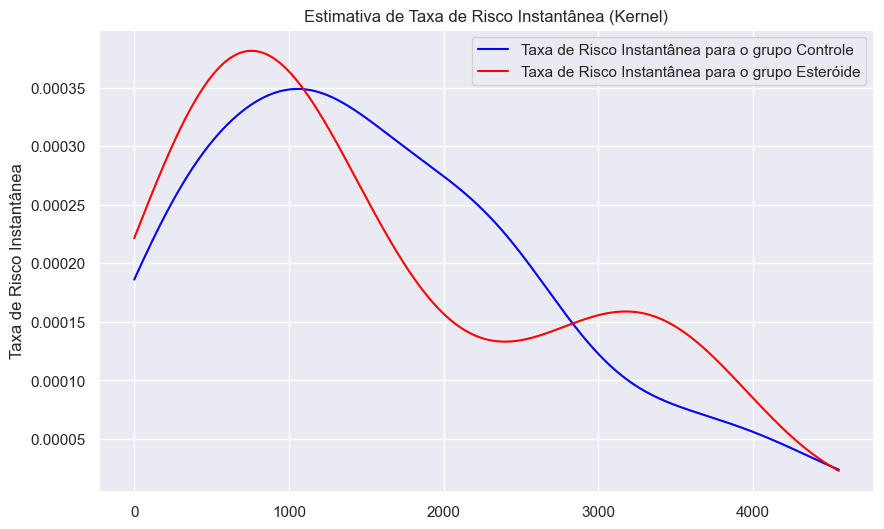

In [31]:
tempos_observados_a = grupo_a[grupo_a.Status == 1]['N_Days'].values
tempos_observados_b = grupo_b[grupo_b.Status == 1]['N_Days'].values

# Estimador de Kernel
kde_a = gaussian_kde(tempos_observados_a, bw_method='scott')
kde_b = gaussian_kde(tempos_observados_b, bw_method='scott')

time_grid = np.linspace(0, max(grupo_a['N_Days']), 10000)

densidade_risco_a = kde_a(time_grid)
densidade_risco_b = kde_b(time_grid)

# Plotar a taxa de risco instantânea
plt.figure(figsize=(10, 6))
plt.plot(time_grid, densidade_risco_a, label="Taxa de Risco Instantânea para o grupo Controle", color="blue")
plt.plot(time_grid, densidade_risco_b, label="Taxa de Risco Instantânea para o grupo Esteróide", color="red")
plt.title("Estimativa de Taxa de Risco Instantânea (Kernel)")
plt.ylabel("Taxa de Risco Instantânea")
plt.grid(True)
plt.legend()
plt.show()

In [23]:
# Teste de Log-Rank (para saber se a diferença entre pacientes tratados e não tratados é relevante)

logrank_result = logrank_test(
    grupo_a.N_Days, grupo_b.N_Days,
    event_observed_A=grupo_a.Status, event_observed_B=grupo_b.Status
)

# Exibindo o resultado do teste
print("Resultado do Teste de Log-Rank")
print(f"Estatística do teste: {logrank_result.test_statistic:.4f}")
print(f"Valor-p: {logrank_result.p_value:.4f}")

# Interpretação
if logrank_result.p_value < 0.05:
    print("Rejeitamos a hipótese nula: As curvas de sobrevivência são significativamente diferentes.")
else:
    print("Não rejeitamos a hipótese nula: Não há diferença significativa entre as curvas de sobrevivência.")

Resultado do Teste de Log-Rank
Estatística do teste: 0.3331
Valor-p: 0.5638
Não rejeitamos a hipótese nula: Não há diferença significativa entre as curvas de sobrevivência.


**Como o teste de log-rank deu que não existe diferença nas curvas a impressão que tivemos no começo do estudo estava incorreta**

### **Modelo Exponencial**

In [32]:
from lifelines import ExponentialFitter

In [52]:
exp_fitter = ExponentialFitter()
exp_fitter.fit(dataset_tratado.N_Days, event_observed=dataset_tratado.Status)

print("\nParâmetros do modelo exponencial:")
print(exp_fitter.summary)


Parâmetros do modelo exponencial:
                coef    se(coef)  coef lower 95%  coef upper 95%  cmp to  \
lambda_  4676.045317  443.830606     3806.153314      5545.93732     0.0   

                 z             p   -log2(p)  
lambda_  10.535653  5.917108e-26  83.805238  


#### Gráfico da Função de Sobrevivência

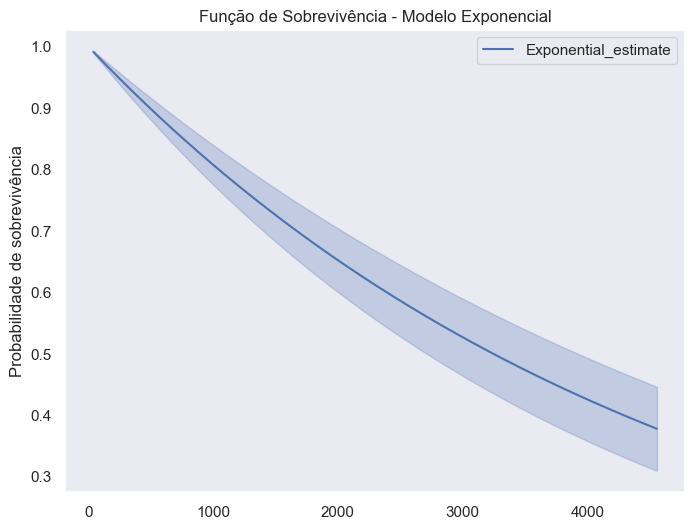

In [ ]:
# Plotar a função de sobrevivência
plt.figure(figsize=(8, 6))
exp_fitter.plot_survival_function()
plt.title('Função de Sobrevivência - Modelo Exponencial')
plt.ylabel('Probabilidade de sobrevivência')
plt.grid()
plt.show()

#### Função de risco e gráfico


Função de risco (constante para modelo exponencial): 4676.0453


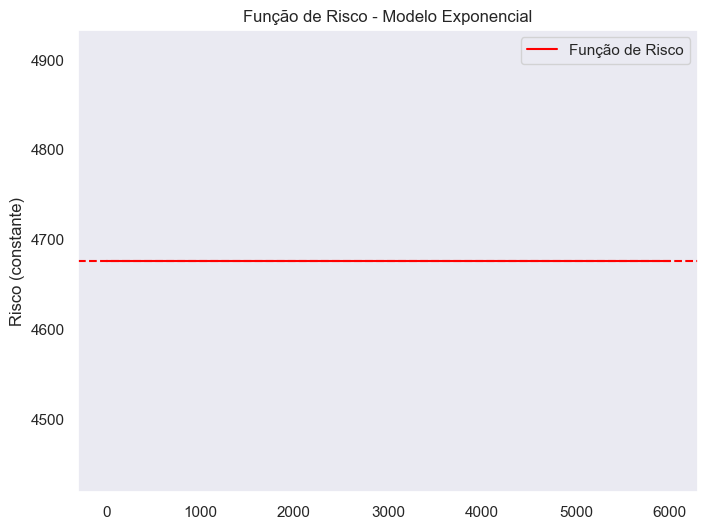

In [ ]:
lambda_param = exp_fitter.lambda_
print(f'\nFunção de risco: {lambda_param:.4f}')

# Plotar a função de risco (constante para o modelo exponencial)
plt.figure(figsize=(8, 6))
tempos = np.linspace(0, 6000, 100)
risco = np.full_like(tempos, lambda_param)
plt.plot(tempos, risco, label='Função de Risco', color='red')
plt.title('Função de Risco - Modelo Exponencial')
plt.ylabel('Risco (constante)')
plt.axhline(y=lambda_param, color='red', linestyle='--')
plt.grid()
plt.legend()
plt.show()

#### Adequação do Modelo

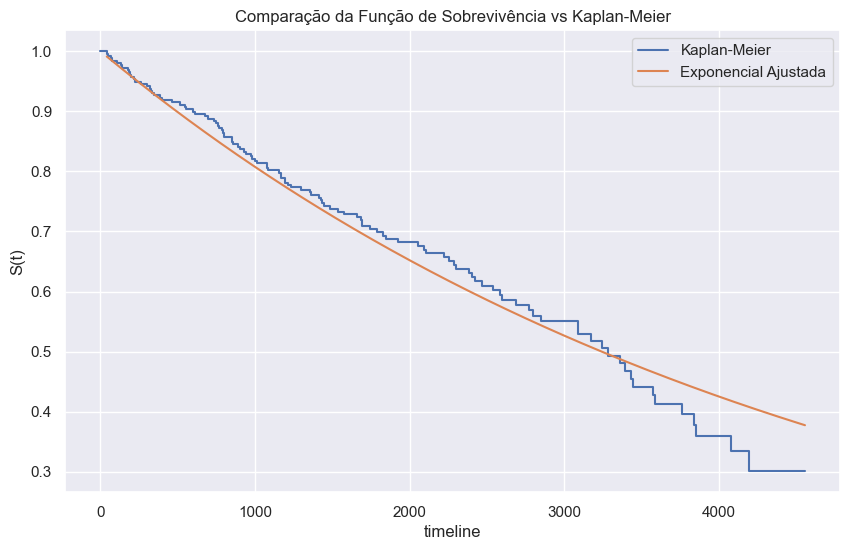

In [42]:
kmf = KaplanMeierFitter()
kmf.fit(dataset_tratado.N_Days, event_observed=dataset_tratado.Status)

plt.figure(figsize=(10,6))
kmf.plot_survival_function(ci_show=False, label='Kaplan-Meier')
exp_fitter.plot_survival_function(ci_show=False, label='Exponencial Ajustada')
plt.title('Comparação da Função de Sobrevivência vs Kaplan-Meier')
plt.ylabel('S(t)')
plt.legend()
plt.show()

#### Gráfico do risco Acumulado

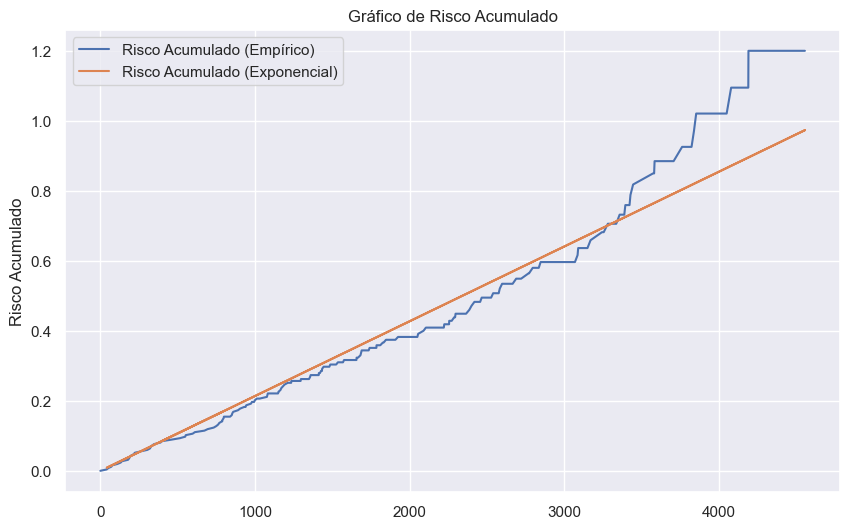

In [ ]:
# Risco acumulado
plt.figure(figsize=(10, 6))
plt.plot(kmf.event_table.index, -np.log(kmf.survival_function_['KM_estimate']), label='Risco Acumulado (Empírico)')

# Foi necessário passar a coluna de N_Days para lista antes de utilizar na função de risco acumulado
plt.plot(dataset_tratado.N_Days, exp_fitter.cumulative_hazard_at_times(dataset_tratado.N_Days.to_list()), label='Risco Acumulado (Exponencial)')
plt.title('Gráfico de Risco Acumulado')
plt.ylabel('Risco Acumulado')
plt.legend()
plt.show()

#### Gráfico Log-Log para o modelo Exponencial

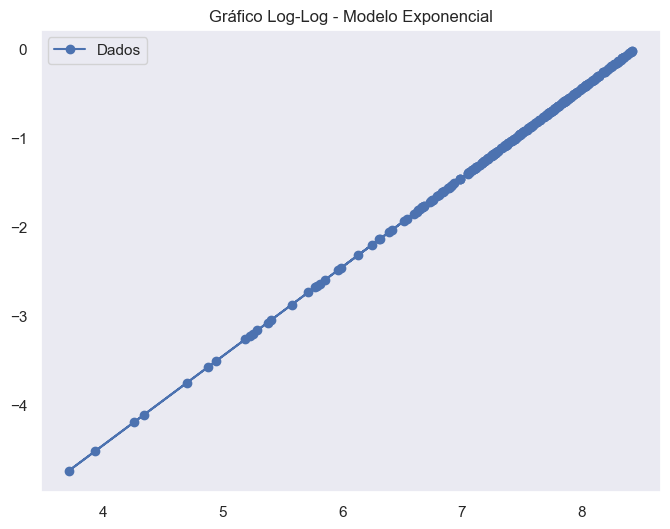

In [66]:
# Função de sobrevivência ajustada pelo modelo Exponencial
sobrevivencia = exp_fitter.survival_function_at_times(dataset_tratado.N_Days.to_list())

# Transformações para o gráfico log-log
log_tempo = np.log(dataset_tratado.N_Days.to_list())
log_neg_log_sobrevivencia = np.log(-np.log(sobrevivencia))

# Plotar gráfico log-log
plt.figure(figsize=(8,6))
plt.plot(log_tempo, log_neg_log_sobrevivencia, 'o-', label='Dados')
plt.title('Gráfico Log-Log - Modelo Exponencial')
plt.grid()
plt.legend()
plt.show()

#### Tempo médio de sobrevivência para o modelo exponencial

In [68]:
tempo_medio_sobrevivencia = 1/lambda_param
print(f'Tempo médio de sobrevivência: {tempo_medio_sobrevivencia} dias')

Tempo médio de sobrevivência: 0.00021385592571714329 dias


#### Previsão de Sobrevida para o Método Exponencial

In [116]:
tempo_predicao = np.array([450, 900, 2730, 4850, 7000, 15000])
predicoes = exp_fitter.survival_function_at_times(tempo_predicao)

print("\nProbabilidade de sobrevivência prevista para tempos específicos:")
for t, p in zip(tempo_predicao, predicoes):
    print(f"Tempo = {t} dias, Probabilidade de sobrevivência = {p:.2f}")


Probabilidade de sobrevivência prevista para tempos específicos:
Tempo = 450 dias, Probabilidade de sobrevivência = 0.91
Tempo = 900 dias, Probabilidade de sobrevivência = 0.82
Tempo = 2730 dias, Probabilidade de sobrevivência = 0.56
Tempo = 4850 dias, Probabilidade de sobrevivência = 0.35
Tempo = 7000 dias, Probabilidade de sobrevivência = 0.22
Tempo = 15000 dias, Probabilidade de sobrevivência = 0.04


**O modelo aparentemente é bom para prever a função de sobrevivência, porém é muito ruim prevendo o tempo médio de sobrevivência**

### **Modelo Log-Normal**

In [88]:
from lifelines import LogNormalFitter
from scipy.stats import probplot

#### Ajuste do modelo Log-Normal

In [73]:
lognormal_fitter = LogNormalFitter()
lognormal_fitter.fit(dataset_tratado.N_Days.to_list(), event_observed=dataset_tratado.Status)

<lifelines.LogNormalFitter:"LogNormal_estimate", fitted with 258 total observations, 147 right-censored observations>

#### Parâmetros no Método Log-Normal

In [74]:
print('\nParâmetros do modelo Log-Normal:')
print(lognormal_fitter.summary)


Parâmetros do modelo Log-Normal:
            coef  se(coef)  coef lower 95%  coef upper 95%  cmp to          z  \
mu_     8.135949  0.121673        7.897475        8.374424     0.0  66.867418   
sigma_  1.453290  0.105862        1.245804        1.660777     1.0   4.281889   

               p   -log2(p)  
mu_     0.000000        inf  
sigma_  0.000019  15.719674  


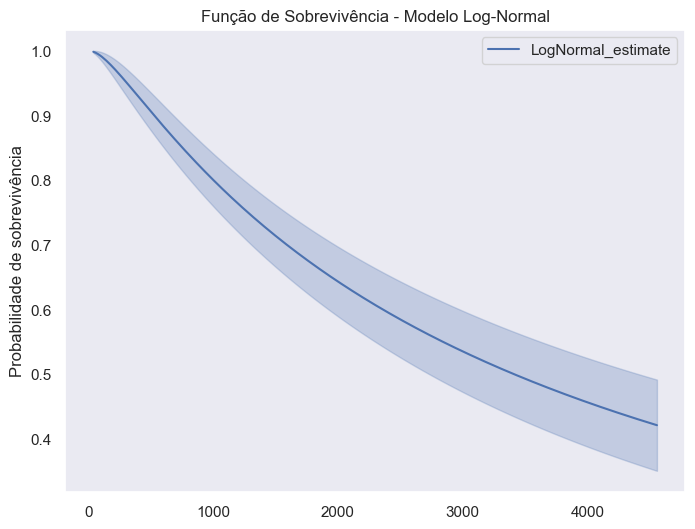

In [76]:
# Plotar a função de sobrevivência
plt.figure(figsize=(8, 6))
lognormal_fitter.plot_survival_function()
plt.title('Função de Sobrevivência - Modelo Log-Normal')
plt.ylabel('Probabilidade de sobrevivência')
plt.grid()
plt.show()

#### Função de risco

In [77]:
tempos_plot = np.linspace(0.1, max(dataset_tratado.N_Days.to_list()), 100)
risco = lognormal_fitter.hazard_at_times(tempos_plot)

#### Gráfico da Função de Risco

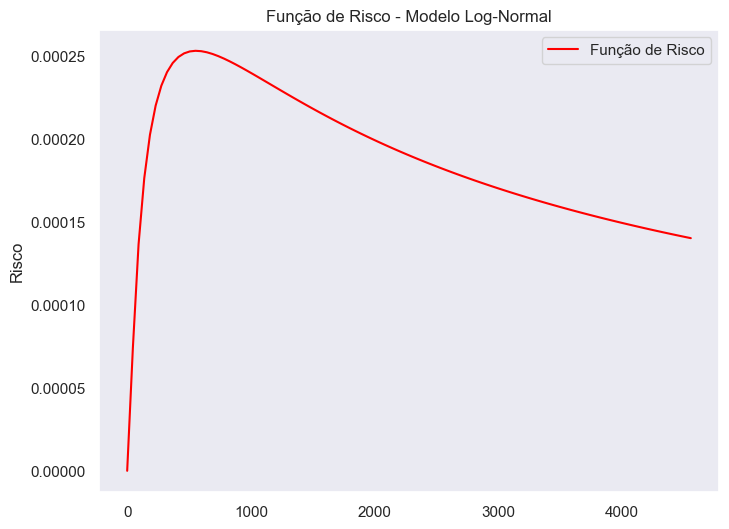

In [79]:
# Plotar a função de risco
plt.figure(figsize=(8, 6))
plt.plot(tempos_plot, risco, label='Função de Risco', color='red')
plt.title('Função de Risco - Modelo Log-Normal')
plt.ylabel('Risco')
plt.grid()
plt.legend()
plt.show()

#### Tempo Médio Esperado de Sobrevivência

In [81]:
# Tempo médio de sobrevivência (estimado numericamente)
def tempo_medio_lognormal(mu, sigma):
    from scipy.stats import lognorm
    mean = lognorm.mean(s=sigma, scale=np.exp(mu))
    return mean

mu = lognormal_fitter.mu_  # Parâmetro de localização (mu)
sigma = lognormal_fitter.sigma_  # Parâmetro de escala (sigma)

tempo_medio_sobrevivencia = tempo_medio_lognormal(mu, sigma)
print(f"\nTempo médio de sobrevivência: {tempo_medio_sobrevivencia:.2f} dias")


Tempo médio de sobrevivência: 9818.03 dias


#### Previsão

In [83]:
# Previsões para tempos específicos
tempos_prev = np.array([400, 2500, 3200, 5000])
previsoes_sobrevivencia = lognormal_fitter.survival_function_at_times(tempos_prev)

print("\nProbabilidade de sobrevivência para tempos específicos:")
for t, p in zip(tempos_prev, previsoes_sobrevivencia):
    print(f"Tempo = {t} dias, Probabilidade de sobrevivência = {p:.2f}")



Probabilidade de sobrevivência para tempos específicos:
Tempo = 400 dias, Probabilidade de sobrevivência = 0.93
Tempo = 2500 dias, Probabilidade de sobrevivência = 0.58
Tempo = 3200 dias, Probabilidade de sobrevivência = 0.52
Tempo = 5000 dias, Probabilidade de sobrevivência = 0.40


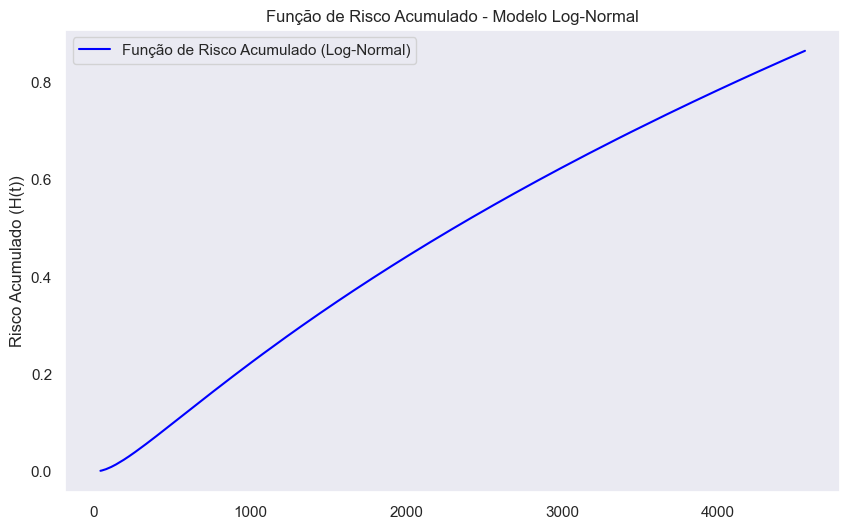

In [98]:
# Calcular risco acumulado
cumulative_hazard = lognormal_fitter.cumulative_hazard_at_times(dataset_tratado.N_Days.sort_values().unique())

# Plotar o risco acumulado
plt.figure(figsize=(10, 6))
plt.plot(dataset_tratado.N_Days.sort_values().unique(), cumulative_hazard, label='Função de Risco Acumulado (Log-Normal)', color='blue')
plt.title('Função de Risco Acumulado - Modelo Log-Normal')
plt.ylabel('Risco Acumulado (H(t))')
plt.legend()
plt.grid()
plt.show()

In [97]:
dataset_tratado.N_Days.sort_values().unique()

array([  41,   51,   71,   77,  110,  131,  140,  179,  186,  191,  198,
        216,  223,  264,  304,  321,  326,  334,  348,  388,  400,  460,
        515,  549,  552,  597,  611,  673,  694,  733,  750,  762,  769,
        786,  788,  790,  797,  799,  839,  850,  853,  859,  890,  904,
        930,  939,  943,  974,  980,  994,  999, 1012, 1030, 1077, 1080,
       1083, 1149, 1152, 1153, 1165, 1170, 1191, 1212, 1216, 1230, 1234,
       1235, 1250, 1271, 1293, 1295, 1297, 1300, 1302, 1320, 1321, 1329,
       1349, 1356, 1360, 1363, 1401, 1408, 1412, 1413, 1418, 1420, 1427,
       1433, 1434, 1444, 1455, 1457, 1481, 1487, 1525, 1536, 1558, 1568,
       1569, 1576, 1592, 1614, 1615, 1656, 1657, 1666, 1682, 1690, 1701,
       1702, 1735, 1741, 1765, 1769, 1770, 1776, 1783, 1785, 1786, 1790,
       1810, 1827, 1831, 1832, 1847, 1882, 1908, 1925, 1932, 1945, 1951,
       1967, 1978, 1979, 2022, 2050, 2055, 2090, 2105, 2106, 2157, 2176,
       2178, 2216, 2221, 2224, 2255, 2256, 2272, 22

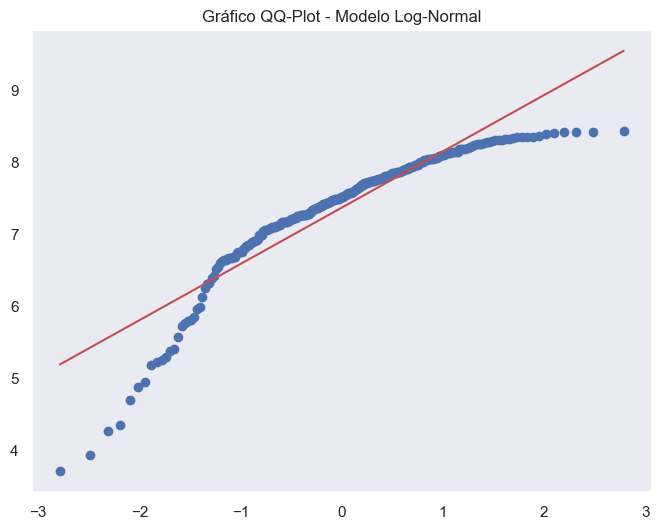

In [ ]:
# Gráfico QQ-Plot para verificar ajuste ao modelo Log-Normal
log_tempos = np.log(dataset_tratado.N_Days)  # Log-transformação dos tempos
plt.figure(figsize=(8, 6))
probplot(log_tempos, dist="norm", plot=plt)
plt.title("Gráfico QQ-Plot - Modelo Log-Normal")
plt.grid()
plt.show()

### **Modelo Weibull**

In [99]:
from lifelines import WeibullFitter

In [100]:
weibull_fitter = WeibullFitter()
weibull_fitter.fit(dataset_tratado.N_Days.to_list(), event_observed=dataset_tratado.Status)

<lifelines.WeibullFitter:"Weibull_estimate", fitted with 258 total observations, 147 right-censored observations>

#### **Função de Sobrevivência**

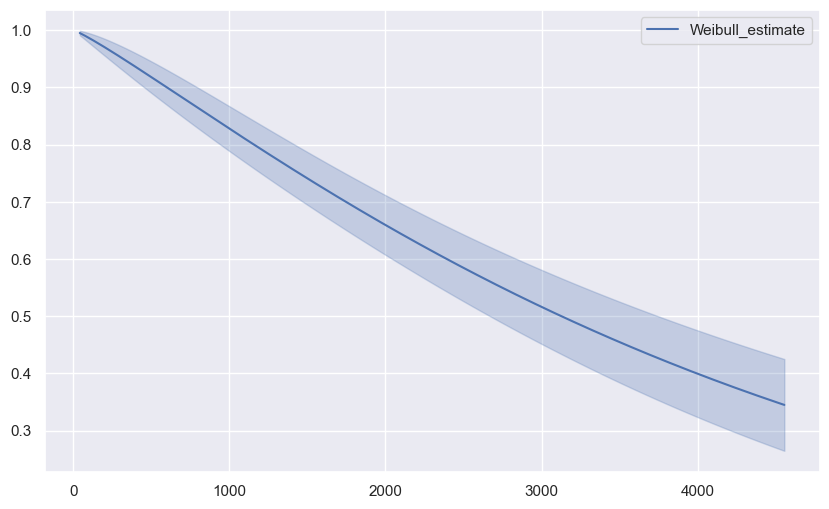

In [101]:
plt.figure(figsize=(10,6))
weibull_fitter.plot_survival_function()
plt.show()

#### **Adequação do Modelo**

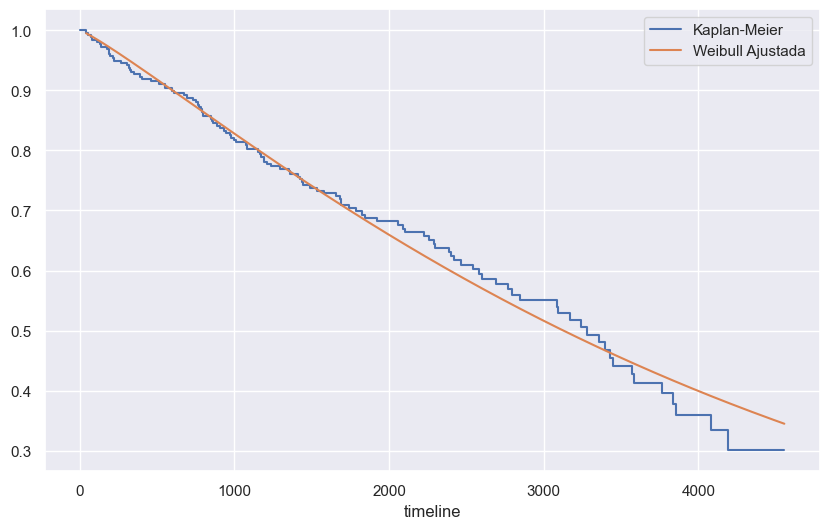

In [103]:
plt.figure(figsize=(10,6))
kmf.plot_survival_function(ci_show=False, label='Kaplan-Meier')
weibull_fitter.plot_survival_function(ci_show=False, label='Weibull Ajustada')
plt.show()


Função de risco: 4313.4329


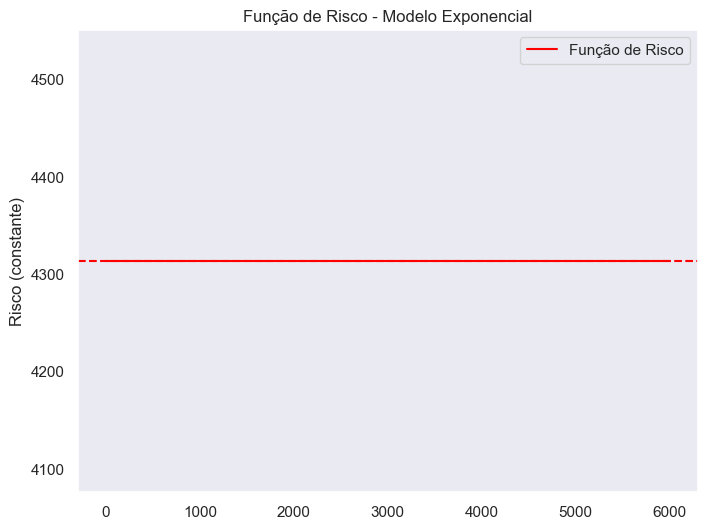

In [104]:
lambda_param = weibull_fitter.lambda_
print(f'\nFunção de risco: {lambda_param:.4f}')

# Plotar a função de risco (constante para o modelo exponencial)
plt.figure(figsize=(8, 6))
tempos = np.linspace(0, 6000, 100)
risco = np.full_like(tempos, lambda_param)
plt.plot(tempos, risco, label='Função de Risco', color='red')
plt.title('Função de Risco - Modelo Exponencial')
plt.ylabel('Risco (constante)')
plt.axhline(y=lambda_param, color='red', linestyle='--')
plt.grid()
plt.legend()
plt.show()

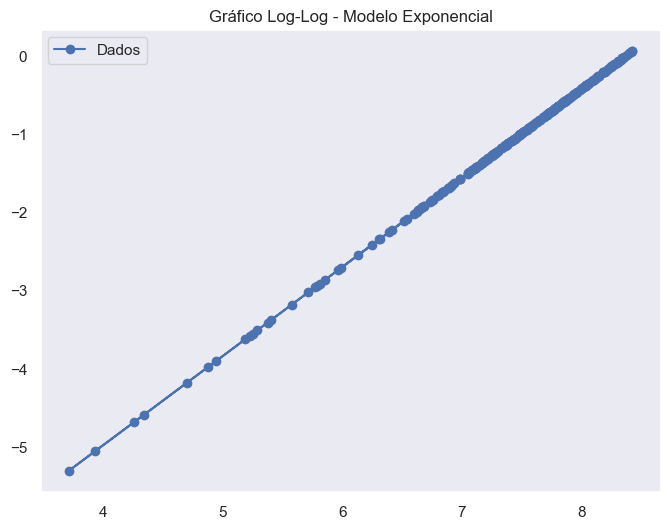

In [105]:
# Função de sobrevivência ajustada pelo modelo Exponencial
sobrevivencia = weibull_fitter.survival_function_at_times(dataset_tratado.N_Days.to_list())

# Transformações para o gráfico log-log
log_tempo = np.log(dataset_tratado.N_Days.to_list())
log_neg_log_sobrevivencia = np.log(-np.log(sobrevivencia))

# Plotar gráfico log-log
plt.figure(figsize=(8,6))
plt.plot(log_tempo, log_neg_log_sobrevivencia, 'o-', label='Dados')
plt.title('Gráfico Log-Log - Modelo Exponencial')
plt.grid()
plt.legend()
plt.show()

In [106]:
weibull_fitter.summary

,coef,se(coef),coef lower 95%,coef upper 95%,cmp to,z,p,-log2(p)
lambda_,4313.432891,411.847258,3506.227098,5120.638684,1.0,10.470952,1.174557e-25,82.816086
rho_,1.139982,0.095090,0.953610,1.326354,1.0,1.472104,1.409928e-01,2.826307


In [108]:
from scipy.special import gamma

# Tempo de Sobrevivência Esperado
print(gamma(1+(1/weibull_fitter.rho_))/weibull_fitter.lambda_)

0.00022120679330891544


#### Previsão de Sobrevida para Weibull

In [115]:
tempos = np.array([450, 900, 2730, 4850, 7000, 15000])
predicoes = weibull_fitter.survival_function_at_times(tempos)

print("\nProbabilidade de sobrevivência prevista para tempos específicos:")
for t, p in zip(tempos, predicoes):
    print(f"Tempo = {t} dias, Probabilidade de sobrevivência = {p:.2f}")


Probabilidade de sobrevivência prevista para tempos específicos:
Tempo = 450 dias, Probabilidade de sobrevivência = 0.93
Tempo = 900 dias, Probabilidade de sobrevivência = 0.85
Tempo = 2730 dias, Probabilidade de sobrevivência = 0.55
Tempo = 4850 dias, Probabilidade de sobrevivência = 0.32
Tempo = 7000 dias, Probabilidade de sobrevivência = 0.18
Tempo = 15000 dias, Probabilidade de sobrevivência = 0.02


### **Teste de Modelos de Regressão**